In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
%pylab inline
%time from data import *

Populating the interactive namespace from numpy and matplotlib
CPU times: user 42.7 s, sys: 7.75 s, total: 50.4 s
Wall time: 50.5 s


In [327]:
item_pairs_train.head()

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [ ]:
item_pairs_train.re

In [368]:
item_pairs_train[item_pairs_train.itemID_1 == item_pairs_train.itemID_2].count()

itemID_1            0
itemID_2            0
isDuplicate         0
generationMethod    0
dtype: int64

### image ids are different even if they are exactly the same image

In [380]:
left_img_ids = get_item(1)['images_array']
right_img_ids = get_item(4112648)['images_array']

In [381]:
def show_images(img_locs):
    for loc in img_locs:
        image = plt.imread(loc)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [382]:
left_img_locs = batch_image_location(left_img_ids)
right_img_locs = batch_image_location(right_img_ids)

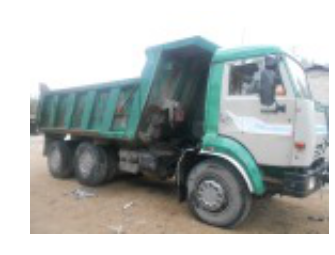

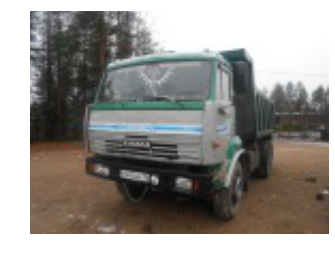

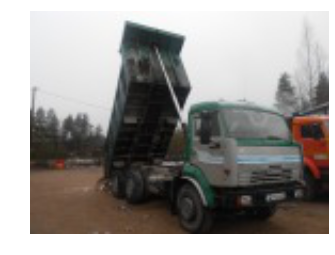

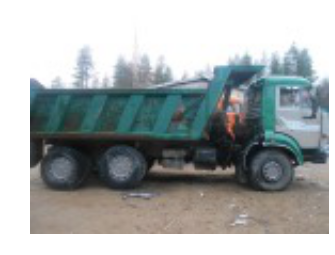

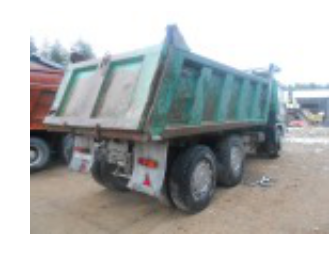

In [383]:
show_images(left_img_locs)

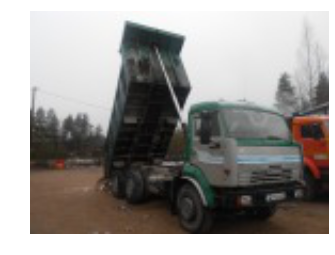

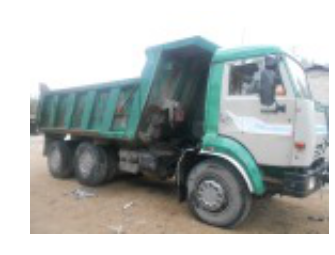

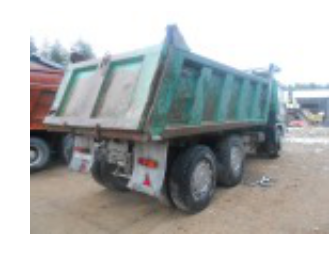

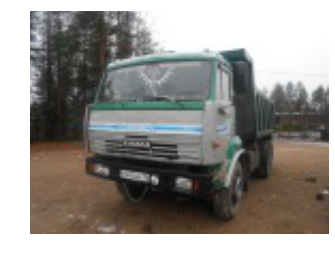

In [384]:
show_images(right_img_locs)

In [385]:
compare_images(left_img_locs, right_img_locs)

(1.0, 1.0, 1.0)